In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import missingno as msno
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df, metadata = pyreadstat.read_sav('tastdb-exp-2019.sav', apply_value_formats=True,dates_as_pandas_datetime =True,  disable_datetime_conversion = False)

Useful questions for EDA


1. In which countries were the most ships registered (Look at variable: National?) ---> How much for Bremen and Prussia 

2. What info can be extracted from the variable ship name? --> SHIPNAME

3. Compare SHIPNAME to NATIONAL? Were the ships using the flag of their place of manufacturing?

4. Was what the most common RIG used by slavers? Are there NATIONAL particularities?

5. Is there any correlation between RIG, TONNAGE, GUNS and FATE of the voyage? ---> GUNS, TONNAGE, YRCONS (year of vessel const), PLACCONS (place of vessel construction) : lots of NaN

6. Who owned the most ventures? Check variable OWNERA--->

7. Which voyages had the maximum numbers of OWNERS from which Countries?

8. Percentage of voyages completed as intended(FATE 1 == 1), shipwrecked, captured by pirates, British

9. Outcome for slaves ---> FATE2, most common fate for slaves

10. Outcome of voyage if vessel captured? FATE3 --->

11. Outcome of voyage for owners -> FATE 4 --> 'Luckiest owner'?

12. RESISTANCE

13. Unique ports of departures ---> PORTDEP?

14. MOST COMMON PORT OF DEPATURE PORTDEP?

15. EMBPORT --> Embarkation port

16. Where were the slaves bought? ---> EMBREG First intended region of purchase of slaves

17. first intended port of disembarkation ---> EMBREG First intended region of purchase of slaves

18. PLAC1TRA First place of slave purchase

19. voyage duration : DATE_END Date when voyage completed - DATEDEPC Year that voyage began 

20. TSLAVESP Total slaves purchased 

21. SLAARRIV Total slaves arrived at first port of disembarkation - TSLAVESD Total slaves on board at departure from last slaving port






The dataset has a 36108 observations and 274 variables

In [3]:
pd.options.display.max_columns = 280
df.shape


(36108, 274)

### Checking the State of the Dataset 

#### Total and Percentage of Missing Data

In [4]:
pd.set_option("display.max_rows", 280)

In [5]:
df.shape

(36108, 274)

In [6]:
mask = df.isnull()
total= mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis= 1, join = 'outer', 
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by= 'perc_missing', ascending= False, inplace = True)
missing_data

,count_missing,perc_missing
ADULT6,36108,100.000000
CHILD5,36108,100.000000
INFANT5,36108,100.000000
INFANT6,36108,100.000000
ADULT4,36108,100.000000
FEMALE5,36107,99.997231
INFANT2,36107,99.997231
ADULT5,36107,99.997231
MALE5,36107,99.997231
ADULT2,36107,99.997231


In [7]:
num_missing = missing_data['perc_missing'] > 80

In [8]:
#num_missing

In [9]:
miss = missing_data[num_missing].shape
miss

(162, 2)

In [10]:
per_above_80 = miss[0] / 274

In [11]:
per_above_80

0.5912408759124088

**Basically, 60% of the columns have at least 80% of their data missing. Data science workshops recommend dropping columns that have more than 80% of their data missing.** 

### Visualizing Missing Data in the Dataset 

In [12]:
nullable_columns = df.columns[mask.any()].tolist()

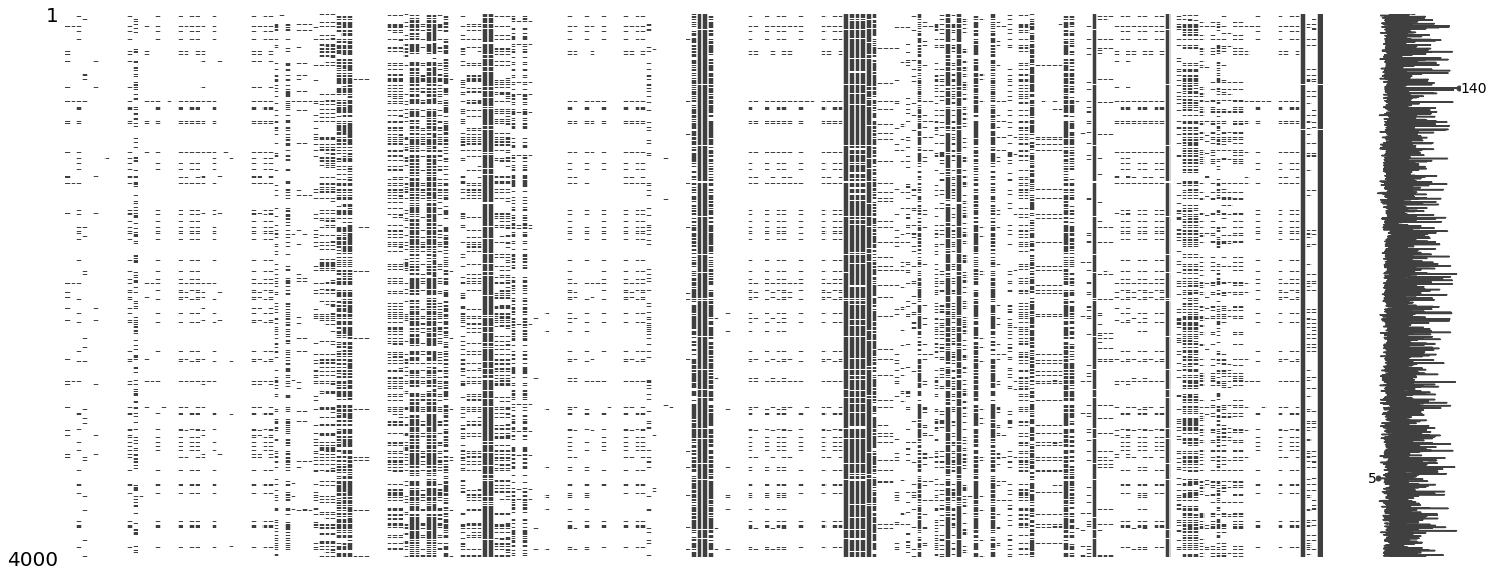

In [13]:
fig=msno.matrix(df[nullable_columns].sample(4000))

In [14]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_matrix.png')

In [15]:
plt.show()

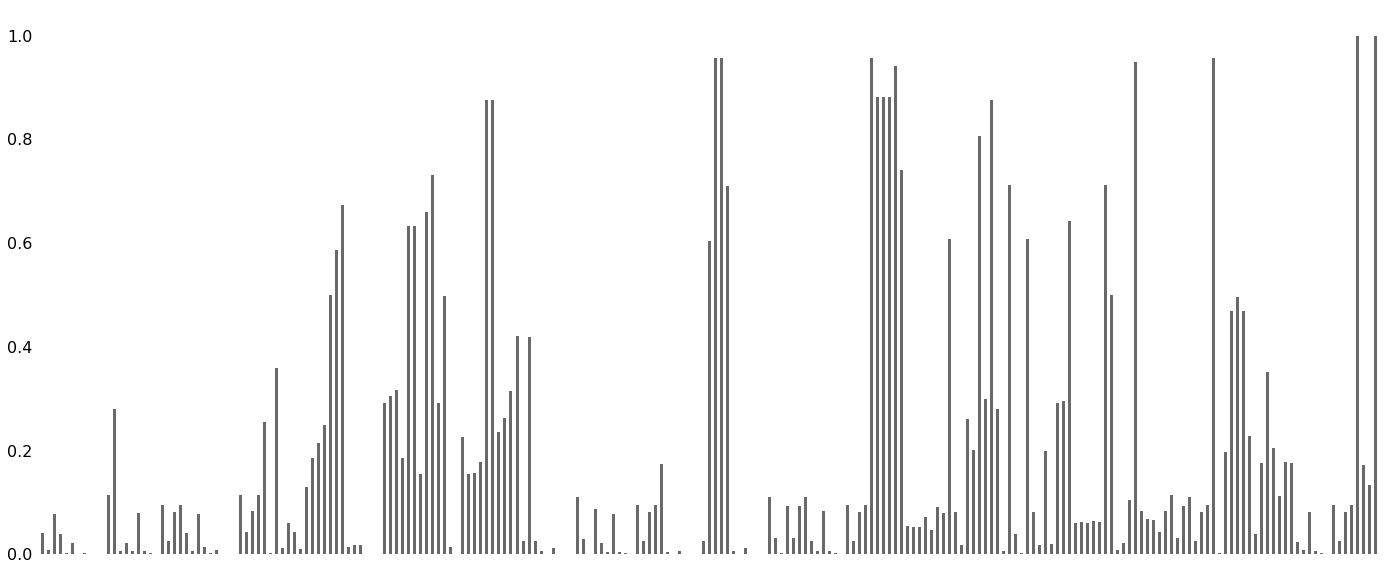

In [16]:
fig = msno.bar(df[nullable_columns].sample(4000))

In [17]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_bar.png')

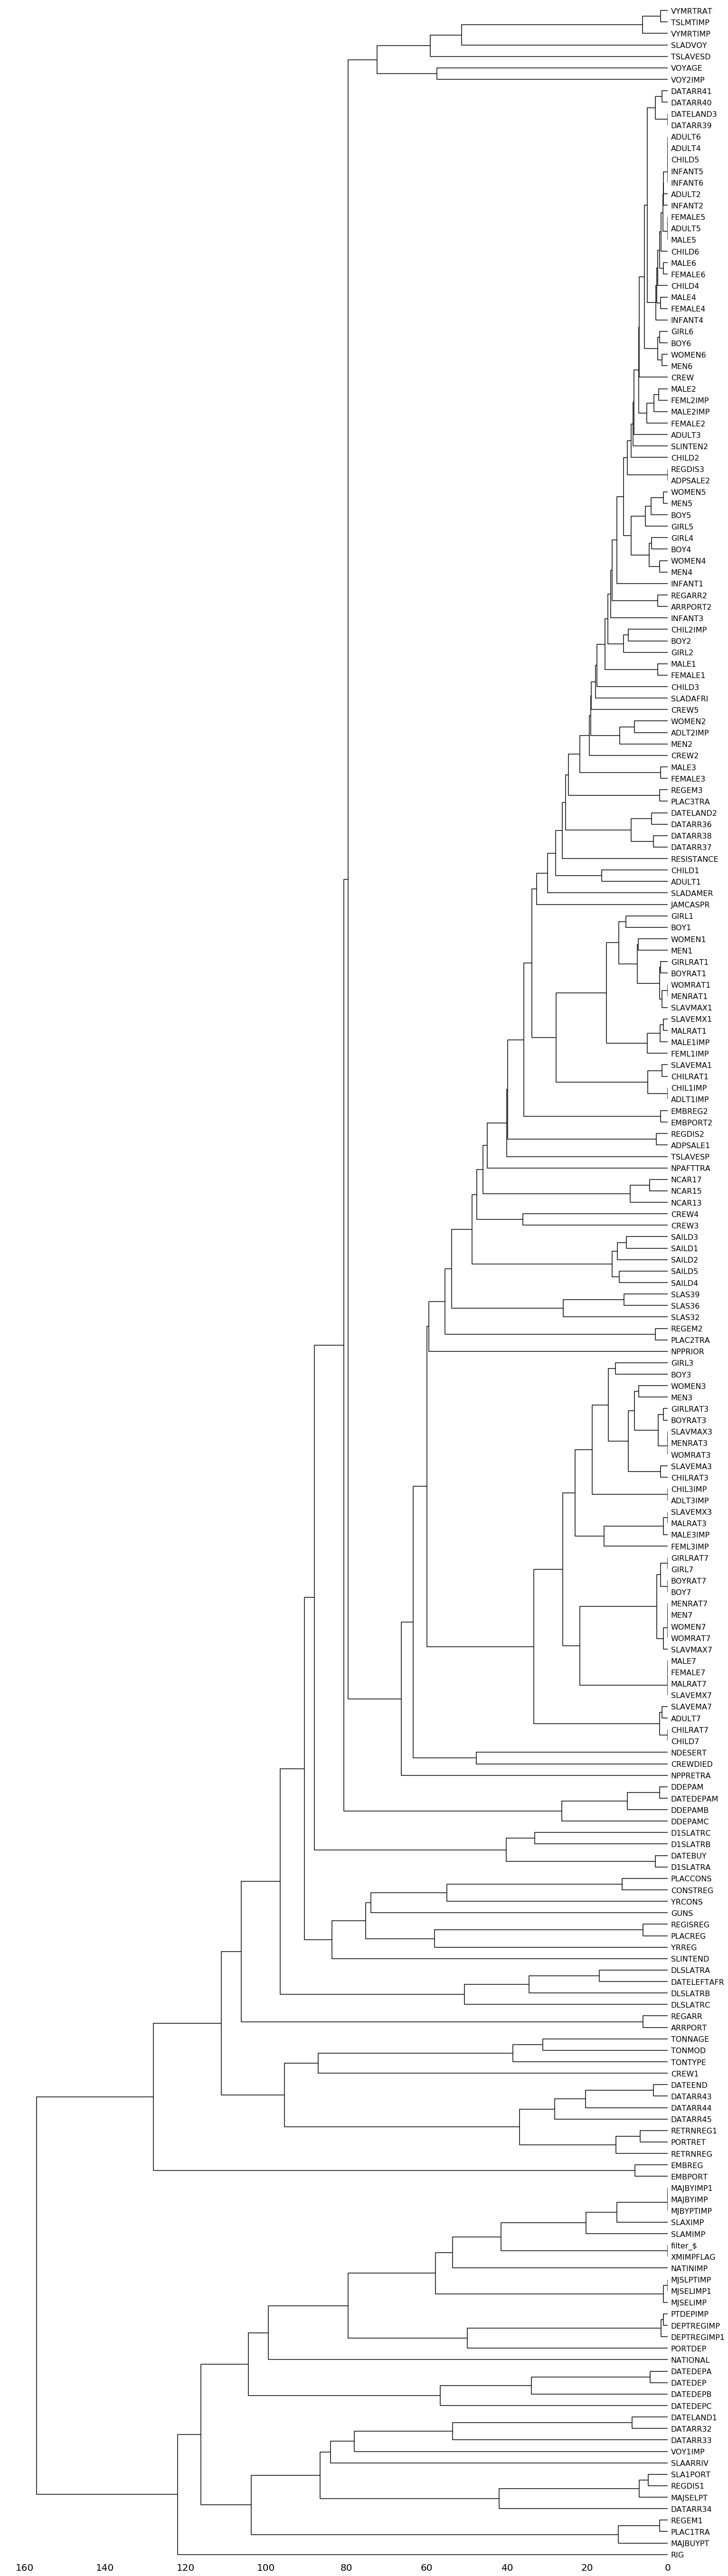

In [18]:
fig = msno.dendrogram(df[nullable_columns])

In [19]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_dendogramm.png')

#### Filtering and Keeping Columns where missing values < 80

In [20]:
#df = df[[col for col in df.columns if 100 * df[col].isnull().sum().mean() < 80]]

In [21]:
#df

In [22]:
df = df.drop(columns = ['YRCONS', 'YRREG', 'filter_$', 'WOMEN1', 'WOMEN2', 'WOMEN3', 'WOMEN4', 'WOMEN5',
                        'WOMEN6', 'WOMEN7', 'WOMRAT1', 'WOMRAT3', 'WOMRAT7', 'TSLAVESP', 'TSLMTIMP', 'VOY1IMP','VOY2IMP',
                        'VOYAGE', 'VYMRTIMP','SOURCEH', 'SOURCEI', 'SOURCEJ', 'SOURCEK', 'SOURCEL', 'SOURCEM', 'SOURCEN',
                        'SOURCEO', 'SOURCEP', 'SOURCEQ', 'SOURCER', 'SOURCEB', 'SOURCEC', 'SOURCED', 'SOURCEE', 'SOURCEF', 'SOURCEG',
                       'SLAS32', 'SLAS36', 'SLAS39', 'SLAVEMA1', 'SLAVEMA3', 'SLAVEMA7', 'SLAVEMX1', 'SLAVEMX3', 'SLAVEMX7',
                        'SLAVMAX1', 'SLAVMAX3','SLAVMAX7', 'SLINTEN2','SLADAFRI', 'SLADAMER', 'SLADVOY', 'SAILD1', 'SAILD2', 'SAILD3', 
                        'SAILD4', 'SAILD5','REGDIS3', 'REGARR2', 'PLAC2TRA', 'PLAC3TRA', 'OWNERB', 'OWNERC', 'OWNERD', 'OWNERE',
                        'OWNERF', 'OWNERG', 'OWNERH', 'OWNERI', 'OWNERJ', 'OWNERK', 'OWNERL', 'OWNERM', 'OWNERN',
                        'OWNERO', 'OWNERP', 'NCAR13', 'NCAR15', 'NCAR17', 'NDESERT', 'NPAFTTRA', 'NPPRETRA','NPPRIOR',
                         'MALE1', 'MALE2', 'MALE3', 'MALE4', 'MALE5', 'MALE6', 'MALE7','MALE1IMP','MALE2IMP','MALE3IMP','MALRAT1',
                        'MALRAT3', 'MALRAT7', 'MEN1', 'MEN2','MEN3', 'MEN4','MEN5', 'MEN6', 'MEN7','MENRAT1','MENRAT3','MENRAT7', 
                       'INFANT1', 'INFANT2', 'INFANT3', 'INFANT4','INFANT5', 'INFANT6', 'JAMCASPR', 'FEMALE1','FEMALE2', 'FEMALE3',
                        'FEMALE4', 'FEMALE5', 'FEMALE6', 'FEMALE7', 'FEML1IMP','FEML2IMP','FEML3IMP', 'GIRL2','GIRL3', 'GIRL4', 'GIRL5',
                        'GIRL6', 'GIRL7','GIRLRAT1', 'GIRLRAT3','GIRLRAT7', 'EMBPORT2', 'DATARR38', 'DATARR39', 'DATARR40',
                        'DATARR41', 'DATARR36', 'DATARR37', 'DATARR38', 'DATARR39', 'DATARR40', 'DATARR41', 'DATARR43', 'DATARR44',
                       'CREW', 'CREW1', 'CREW2','CREW3','CREW4','CREW5','CREWDIED','CHILRAT3', 'CHILD1', 'CHILD2','CHILD3', 'CHILD4',
                        'CHILD5', 'CHILD6', 'CHILD7', 'CAPTAINB', 'CAPTAINC', 'ARRPORT2', 'BOY1', 'BOY2', 'BOY3', 'BOY4', 'BOY5', 'BOY6', 'BOY7',
                        'BOYRAT1', 'BOYRAT3', 'BOYRAT7','ADPSALE2', 'ADULT1', 'ADULT2','ADULT3','ADULT4','ADULT5','ADULT6','ADULT7',
                        'ADLT2IMP', 'ADLT3IMP'])

In [23]:
df.sample(2)

,VOYAGEID,ADLT1IMP,ADPSALE1,ARRPORT,CAPTAINA,CHIL1IMP,CHIL2IMP,CHIL3IMP,CHILRAT1,CHILRAT7,CONSTREG,D1SLATRA,D1SLATRB,D1SLATRC,DATARR32,DATARR33,DATARR34,DATARR45,DATEBUY,DATEDEP,DATEDEPA,DATEDEPAM,DATEDEPB,DATEDEPC,DATEEND,DATELAND1,DATELAND2,DATELAND3,DATELEFTAFR,DDEPAM,DDEPAMB,DDEPAMC,DEPTREGIMP,DEPTREGIMP1,DLSLATRA,DLSLATRB,DLSLATRC,EMBPORT,EMBREG,EMBREG2,EVGREEN,FATE,FATE2,FATE3,FATE4,GIRL1,GUNS,MAJBUYPT,MAJBYIMP,MAJBYIMP1,MAJSELPT,MJBYPTIMP,MJSELIMP,MJSELIMP1,MJSLPTIMP,NATINIMP,NATIONAL,OWNERA,PLAC1TRA,PLACCONS,PLACREG,PORTDEP,PORTRET,PTDEPIMP,REGARR,REGDIS1,REGDIS2,REGEM1,REGEM2,REGEM3,REGISREG,RESISTANCE,RETRNREG,RETRNREG1,RIG,SHIPNAME,SLA1PORT,SLAARRIV,SLAMIMP,SLAXIMP,SLINTEND,SOURCEA,TONMOD,TONNAGE,TONTYPE,TSLAVESD,VYMRTRAT,XMIMPFLAG,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP
15658,30096.0,NaN,"Florida, port unspecified",NaN,"Vince, Jean",NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1718.0,6.0,6.0,1718.0,1718.0,4.267210e+09,4.261075e+09,24.0,NaN,10.0,1717.0,4.287946e+09,4.280515e+09,NaN,NaN,4.269283e+09,NaN,NaN,NaN,France,Europe,27.0,1.0,1718.0,NaN,NaN,NaN,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,Whydah,Bight of Benin,Africa,Havana,Whydah,Cuba,Caribbean,Havana,France,France,"Montaudoin, René",Whydah,NaN,NaN,Nantes,Nantes,Nantes,NaN,Cuba,Florida,Bight of Benin,NaN,NaN,NaN,NaN,France,Europe,NaN,Généreuse,Havana,NaN,155.0,165.0,NaN,"mettas,I",92.3,50.0,French,165.0,0.06,"B. of Benin, 1700-1800",years 1716-20,years 1711-20,years 1701-25,1700.0,1718.0,1718.0,1717.0
24957,47963.0,NaN,NaN,NaN,"Alves, Isidoro",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.305552e+09,16.0,NaN,4.0,1814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southeast Brazil,Brazil,NaN,NaN,NaN,Cabinda,West Central Africa and St. Helena,NaN,False,"Left home port, no further record",No information on slaves,Unknown,Unknown outcome,NaN,NaN,NaN,West Central Africa and St. Helena,Africa,NaN,Cabinda,Southeast Brazil,Brazil,Rio de Janeiro,Portugal / Brazil,NaN,,NaN,NaN,NaN,Rio de Janeiro,NaN,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bergantim,S José Diligente Vulcano,NaN,NaN,353.0,390.0,NaN,"GRJ,20/04/1814",NaN,NaN,NaN,NaN,NaN,"Bergantine, 1801-25",years 1811-15,years 1811-20,years 1801-25,1800.0,1814.0,1814.0,1814.0


In [24]:
df = df.drop(columns = ['CHIL1IMP','CHIL2IMP','CHIL3IMP','CHIL1IMP','CHIL2IMP', 'CHIL3IMP','CHILRAT7', 'CONSTREG','D1SLATRA','D1SLATRB','D1SLATRC',
                        'DATARR32','DATARR33', 'DATARR45','DATEBUY', 'DATELAND1','DATELAND2','DATELAND3','DATELEFTAFR','DDEPAM','DDEPAMB','DDEPAMC',
                       'DLSLATRA', 'DLSLATRB', 'DLSLATRC','EMBPORT','EMBREG','EMBREG2'])

In [25]:
df.sample(50)

,VOYAGEID,ADLT1IMP,ADPSALE1,ARRPORT,CAPTAINA,CHILRAT1,DATARR34,DATEDEP,DATEDEPA,DATEDEPAM,DATEDEPB,DATEDEPC,DATEEND,DEPTREGIMP,DEPTREGIMP1,EVGREEN,FATE,FATE2,FATE3,FATE4,GIRL1,GUNS,MAJBUYPT,MAJBYIMP,MAJBYIMP1,MAJSELPT,MJBYPTIMP,MJSELIMP,MJSELIMP1,MJSLPTIMP,NATINIMP,NATIONAL,OWNERA,PLAC1TRA,PLACCONS,PLACREG,PORTDEP,PORTRET,PTDEPIMP,REGARR,REGDIS1,REGDIS2,REGEM1,REGEM2,REGEM3,REGISREG,RESISTANCE,RETRNREG,RETRNREG1,RIG,SHIPNAME,SLA1PORT,SLAARRIV,SLAMIMP,SLAXIMP,SLINTEND,SOURCEA,TONMOD,TONNAGE,TONTYPE,TSLAVESD,VYMRTRAT,XMIMPFLAG,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP
32300,82681.0,NaN,NaN,NaN,"Lewin, Robert",NaN,1789.0,6.512141e+09,22.0,NaN,2.0,1789.0,6.549293e+09,England,Europe,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,Gambia,Senegambia and offshore Atlantic,Africa,"Jamaica, port unspecified",Gambia,Jamaica,Caribbean,"Jamaica, port unspecified",Great Britain,Great Britain,"Lyttleton, William",Gambia,London,London,London,London,London,NaN,Jamaica,NaN,Senegambia and offshore Atlantic,NaN,NaN,England,NaN,England,Europe,Ship,Mentor,"Jamaica, port unspecified",190.0,190.0,207.0,226.0,LR1790,136.0,136.0,English 1,NaN,NaN,"Ship, 1776-1800",years 1786-90,years 1781-91,years 1776-1800,1700.0,1789.0,1789.0,1789.0
1925,1949.0,NaN,NaN,NaN,"Costa, J A da",NaN,1839.0,8.090842e+09,5.0,NaN,3.0,1839.0,NaN,Southeast Brazil,Brazil,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,Quilimane,Southeast Africa and Indian Ocean islands,Africa,Campos,Quilimane,Southeast Brazil,Brazil,Campos,Portugal / Brazil,Portugal,,Quilimane,NaN,NaN,Rio de Janeiro,NaN,Rio de Janeiro,NaN,Southeast Brazil,NaN,Southeast Africa and Indian Ocean islands,NaN,NaN,NaN,NaN,NaN,NaN,Brig,Novo Destino,Campos,600.0,600.0,662.0,NaN,"PP,1845,XLIX:593-633",229.0,229.0,Portuguese,NaN,NaN,"Brig, 1826-50",years 1836-40,years 1831-40,years 1826-50,1800.0,1839.0,1839.0,1839.0
34808,91593.0,NaN,NaN,"South Carolina, port unspecified","Clifton, John",NaN,1772.0,5.954774e+09,26.0,NaN,6.0,1771.0,5.984582e+09,England,Europe,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,0.0,Gambia,Senegambia and offshore Atlantic,Africa,"St. Kitts, port unspecified",Gambia,St. Kitts,Caribbean,"St. Kitts, port unspecified",Great Britain,Great Britain,"Tomlinson, John",Gambia,Chowan river,Liverpool,Liverpool,Liverpool,Liverpool,South Carolina,St. Kitts,NaN,Senegambia and offshore Atlantic,NaN,NaN,England,NaN,England,Europe,Brigantine,Aston,"St. Kitts, port unspecified",130.0,130.0,210.0,200.0,"LST,1744-1786",182.3,100.0,English pre-1775,210.0,0.38,"Brigantine, pre-1776",years 1771-75,years 1771-1780,years 1751-75,1700.0,1772.0,1772.0,1771.0
32331,82726.0,NaN,NaN,NaN,"Joynson, Moses",NaN,NaN,6.784214e+09,7.0,NaN,10.0,1797.0,NaN,England,Europe,True,"Shipwrecked or destroyed, before slaves embarked",No slaves embarked,Natural hazard,Original goal thwarted (natural hazard),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great Britain,Great Britain,"Neilson, William",NaN,"USA, location unspecified",NaN,Liverpool,NaN,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brig,Mersey,NaN,NaN,NaN,NaN,225.0,LR1798,135.0,135.0,English 1,NaN,NaN,"Brig, 1776-1800",years 1796-1800,years 1791-1800,years 1776-1800,1700.0,1797.0,1797.0,1797.0
31939,82239.0,NaN,NaN,NaN,"Backhouse, Gerard",NaN,1782.0,6.300893e+09,14.0,NaN,6.0,1782.0,NaN,England,Europe,True,"Shipwrecked or destroyed, after embarkation of...",Slaves perished with ship,Natural hazard,Original goal thwarted (natural hazard),NaN,NaN,Bonny,Bight of Biafra and Gulf of Guinea islands,Africa,"Barbados, port unspecified",Bonny,Barbados,Caribbean,"Barbados, port unspecified",Great Britain,Great Britain,"Copland, John",Bonny,Liverpool,NaN,Liverpool,NaN,Liverpool,NaN,Barbados,NaN,Bight of Biafra and Gulf of Guinea islands,NaN,NaN,NaN,NaN,NaN,NaN,Ship,Lark,"Barbados,

In [26]:
df = df.drop(columns = ['ADLT1IMP', 'CHILRAT1', 'GIRL1' , 'REGDIS2', 'REGEM2','REGEM3', 'REGISREG', 'RETRNREG', 'RETRNREG1' ])

In [27]:
df.shape

(36108, 61)